# An example with Synphot

SPICE meshes can be used with other packages for synthetic spectroscopy as well. Here, let's compare with using ```synphot``` (https://synphot.readthedocs.io) to generate the synthetic photometry using SPICE synthetic spectra.

In [9]:
import matplotlib.pyplot as plt
from synphot import SourceSpectrum
from synphot.models import Empirical1D
from synphot import Observation, SpectralElement
import numpy as np
import astropy.units as u
from spice.models.mesh_model import IcosphereModel
from spice.spectrum.spectrum import simulate_observed_flux

import matplotlib
%matplotlib inline

from transformer_payne import Blackbody

In [5]:
bb = Blackbody()
m = IcosphereModel.construct(10000, 1., 1., bb.to_parameters(), bb.parameter_names)

/Users/mjablons/Documents/stellar-mesh-integration/src/spice/models/mesh_model.py:222: UserWarning: If override_log_g is True, either parameter_names must include one of [logg,loggs,log_g,log_gs,log g,log gs,surface gravity,surface gravities,surface_gravity,surface_gravities], or log_g_index must be passed for log g to be used in the spectrum emulator.
  warnings.warn(f"If override_log_g is True, either parameter_names must include one of [" + ",".join(


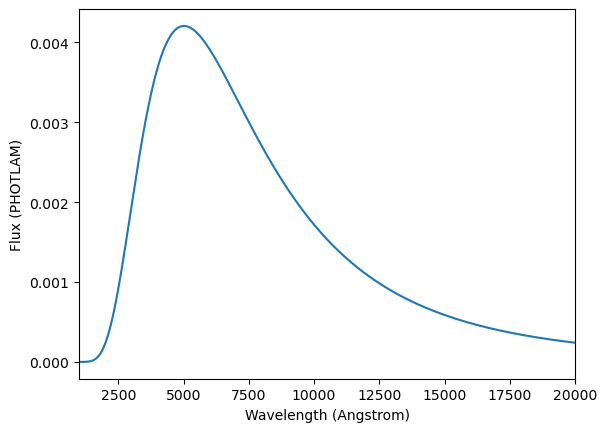

In [20]:
vws = np.linspace(1000., 40000., 1000)
spec = simulate_observed_flux(bb.intensity, m, np.log10(vws))
synphot_spec = SourceSpectrum(Empirical1D, points=vws, lookup_table=spec[:, 0])
synphot_spec.plot(left=1000, right=20000);

In [21]:
obs = Observation(synphot_spec, SpectralElement.from_filter('johnson_v'), binset=vws)
obs.effstim(u.ABmag).value

13.471113727080553